# Bottom-up Hierarchical Clustering

In [16]:
#imports
from __future__ import division
from functools import reduce,partial


import math,random
import matplotlib.pyplot as plt


In [8]:
# Vector functions
def vector_add(v,w):
    return [v_i+w_i for v_i,w_i in zip(v,w)]

def vector_subtraction(v,w):
    return [v_i - w_i for v_i,w_i in zip(v,w)]
vector_sum = partial(reduce,vector_add)
def scalar_multiply(c,v):
    return [c*v_i for v_i in v]
def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))
def squared_distance(v,w):
    return sum([(v_i - w_i)**2
               for v_i,w_i in zip(v,w)])
def distance(v,w):
    return math.sqrt(squared_distance(v,w))

In [10]:
def is_leaf(cluster):
    return len(cluster) == 1
def get_children(cluster):
    if is_leaf(cluster):
        raise TypeError("A leaf node doesn't have any children")
    else:
        return cluster[1]
def get_values(cluster):
    if is_leaf(cluster):
        return cluster
    else:
        return [value
               for child in get_children(cluster)
               for value in get_values(child)]
def cluster_distance(cluster1,cluster2,distance_agg=min):
    return distance_agg([distance(val_1,val_2)
                        for val_1 in get_values(cluster1)
                        for val_2 in get_values(cluster2)])

def get_merge_order(cluster):
    if is_leaf(cluster):
        return float("inf")
    else:
        return cluster[0]

In [11]:
def bottom_up_cluster(inputs, distance_agg=min):
    # start with every input a leaf cluster / 1-tuple
    clusters = [(input,) for input in inputs]

    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min([(cluster1, cluster2)
                     for i, cluster1 in enumerate(clusters)
                     for cluster2 in clusters[:i]],
                     key=lambda p: cluster_distance(p[0], p[1], distance_agg))

        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]

        # merge them, using merge_order = # of clusters left
        merged_cluster = (len(clusters), [c1, c2])

        # and add their merge
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]

def generate_clusters(base_cluster, num_clusters):
    # start with a list with just the base cluster
    clusters = [base_cluster]

    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]
        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))

    # once we have enough clusters...
    return clusters

three clusters, min:


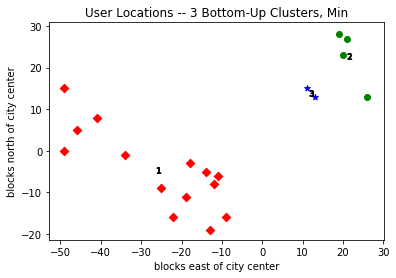

In [20]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
base_cluster = bottom_up_cluster(inputs)
print("three clusters, min:")
three_clusters = [get_values(cluster)
                    for cluster in generate_clusters(base_cluster, 3)]

for i, cluster, marker, color in zip([1, 2, 3],
                                    three_clusters,
                                    ['D','o','*'],
                                    ['r','g','b']):
    xs, ys = zip(*cluster) # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()


three clusters, max:


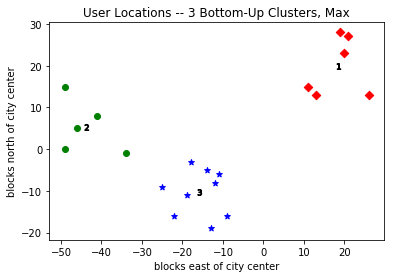

In [21]:
print("three clusters, max:")
base_cluster = bottom_up_cluster(inputs, max)
three_clusters = [get_values(cluster)
                    for cluster in generate_clusters(base_cluster, 3)]

for i, cluster, marker, color in zip([1, 2, 3],
                                    three_clusters,
                                    ['D','o','*'],
                                    ['r','g','b']):
    xs, ys = zip(*cluster) # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Max")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()